# 1. Read the data into Jupyter

In [1]:
# For the following analysis
!pip install pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Meal_Prediction.csv")
print(df.columns.tolist())  # 查看所有列名

['date;close_price_MDCE;daily_volume_M;daily_open_interest_M;daily_open_interest_change_M;daily_sunk_capital_M;daily_swing_M;daily_top20_call_M;daily_top20_put_M;daily_net_open_interest_M;daily_top20_C/P_M;daily_stock_M;daily_basis_M;daily_basis_rate_M;close_price_BDCE;close_price_YDCE;close_price_SCBT;daily_exchange_rate;cont&back_USG-01;cont&back_BZL-05;cont&back_BZL-09']


In [3]:
data_df = pd.read_csv("Meal_Prediction.csv", sep=";",index_col="date")  # 分号分隔符

In [4]:
data_df.head()

,close_price_MDCE,daily_volume_M,daily_open_interest_M,daily_open_interest_change_M,daily_sunk_capital_M,daily_swing_M,daily_top20_call_M,daily_top20_put_M,daily_net_open_interest_M,daily_top20_C/P_M,daily_stock_M,daily_basis_M,daily_basis_rate_M,close_price_BDCE,close_price_YDCE,close_price_SCBT,daily_exchange_rate,cont&back_USG-01,cont&back_BZL-05,cont&back_BZL-09
date,,,,,,,,,,,,,,,,,,,,
18/9/2017,2738,1158322,1792144,-30756,34.247872,0.012418,548335,741344,-310374,0.739650,15946,59,0.021071,3280,6354,968.00,6.5618,174.306554,147.925954,150.647538
19/9/2017,2741,1284218,1877552,85408,36.024590,0.010580,571593,782185,-326110,0.730764,15731,70,0.025000,3275,6332,965.00,6.5859,177.306554,148.925954,151.647538
20/9/2017,2730,721788,1834210,-43342,35.000395,0.007326,556127,773549,-338083,0.718929,15731,70,0.025000,3274,6324,969.25,6.5742,174.945762,146.925954,151.647538
21/9/2017,2730,915492,1883094,48884,36.104561,0.006593,591173,788712,-328125,0.749542,15731,59,0.021071,3263,6276,969.25,6.5934,171.945762,146.245558,150.967142
22/9/2017,2741,1811852,2129772,246678,41.296279,0.024808,659196,881069,-360766,0.748177,15681,10,0.003571,3278,6232,984.25,6.5922,171.945762,145.565161,150.286746


# Data cleaning

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1726 entries, 18/9/2017 to 31/10/2024
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   close_price_MDCE              1726 non-null   int64  
 1   daily_volume_M                1726 non-null   int64  
 2   daily_open_interest_M         1726 non-null   int64  
 3   daily_open_interest_change_M  1726 non-null   int64  
 4   daily_sunk_capital_M          1726 non-null   float64
 5   daily_swing_M                 1726 non-null   float64
 6   daily_top20_call_M            1726 non-null   int64  
 7   daily_top20_put_M             1726 non-null   int64  
 8   daily_net_open_interest_M     1726 non-null   int64  
 9   daily_top20_C/P_M             1726 non-null   float64
 10  daily_stock_M                 1726 non-null   int64  
 11  daily_basis_M                 1726 non-null   int64  
 12  daily_basis_rate_M            1726 non-null   float64

In [6]:
data_df.isnull().sum()

close_price_MDCE                0
daily_volume_M                  0
daily_open_interest_M           0
daily_open_interest_change_M    0
daily_sunk_capital_M            0
daily_swing_M                   0
daily_top20_call_M              0
daily_top20_put_M               0
daily_net_open_interest_M       0
daily_top20_C/P_M               0
daily_stock_M                   0
daily_basis_M                   0
daily_basis_rate_M              0
close_price_BDCE                0
close_price_YDCE                0
close_price_SCBT                0
daily_exchange_rate             0
cont&back_USG-01                0
cont&back_BZL-05                0
cont&back_BZL-09                0
dtype: int64

# Data description

In [7]:
data_df.describe()

,close_price_MDCE,daily_volume_M,daily_open_interest_M,daily_open_interest_change_M,daily_sunk_capital_M,daily_swing_M,daily_top20_call_M,daily_top20_put_M,daily_net_open_interest_M,daily_top20_C/P_M,daily_stock_M,daily_basis_M,daily_basis_rate_M,close_price_BDCE,close_price_YDCE,close_price_SCBT,daily_exchange_rate,cont&back_USG-01,cont&back_BZL-05,cont&back_BZL-09
count,1726.000000,1.726000e+03,1.726000e+03,1.726000e+03,1726.000000,1726.000000,1.726000e+03,1.726000e+03,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000
mean,3287.452491,1.133425e+06,1.572953e+06,-1.743349e+02,64.468470,0.016916,7.928976e+05,9.766695e+05,-320066.091541,0.821992,14566.034183,212.730591,0.050713,3904.786790,7419.528389,1161.410197,6.823953,243.109924,146.592540,187.037295
std,474.551424,5.310622e+05,4.779044e+05,8.215526e+04,28.062378,0.008343,1.972044e+05,2.642619e+05,208855.490557,0.098075,8846.646512,311.861191,0.068255,740.079068,1597.757222,253.406563,0.302649,72.718652,60.650821,81.303816
min,2474.000000,2.230730e+05,5.359510e+05,-1.710306e+06,14.344384,0.004213,3.174400e+05,3.590290e+05,-877852.000000,0.567596,0.000000,-197.000000,-0.062745,2698.000000,5234.000000,0.000000,6.259600,136.996854,-76.142837,-20.332654
25%,2880.000000,7.849922e+05,1.271942e+06,-3.059675e+04,39.905087,0.011456,6.391688e+05,7.909505e+05,-469035.000000,0.751641,8299.500000,-16.000000,-0.005197,3272.000000,5824.000000,912.250000,6.537900,182.118337,127.438334,145.111302
50%,3203.500000,1.031285e+06,1.467996e+06,-7.206500e+03,64.052497,0.015070,8.041455e+05,9.803560e+05,-262549.500000,0.824063,12876.000000,122.000000,0.035760,3758.000000,7570.000000,1149.375000,6.874000,230.016661,145.977046,175.920215
75%,3622.000000,1.321224e+06,1.824102e+06,2.152800e+04,80.823029,0.020166,9.186528e+05,1.138723e+06,-167480.250000,0.889554,20272.000000,324.000000,0.088972,4419.750000,8606.000000,1373.750000,7.088050,295.573492,172.742879,214.270711
max,4488.000000,5.341574e+06,3.385712e+06,9.277700e+05,146.282570,0.097665,1.346252e+06,1.886522e+06,17932.000000,1.149444,41127.000000,1480.000000,0.266912,5748.000000,12122.000000,1770.000000,7.341500,428.295077,384.562015,421.243985


# Feature Engineering

<AxesSubplot:>

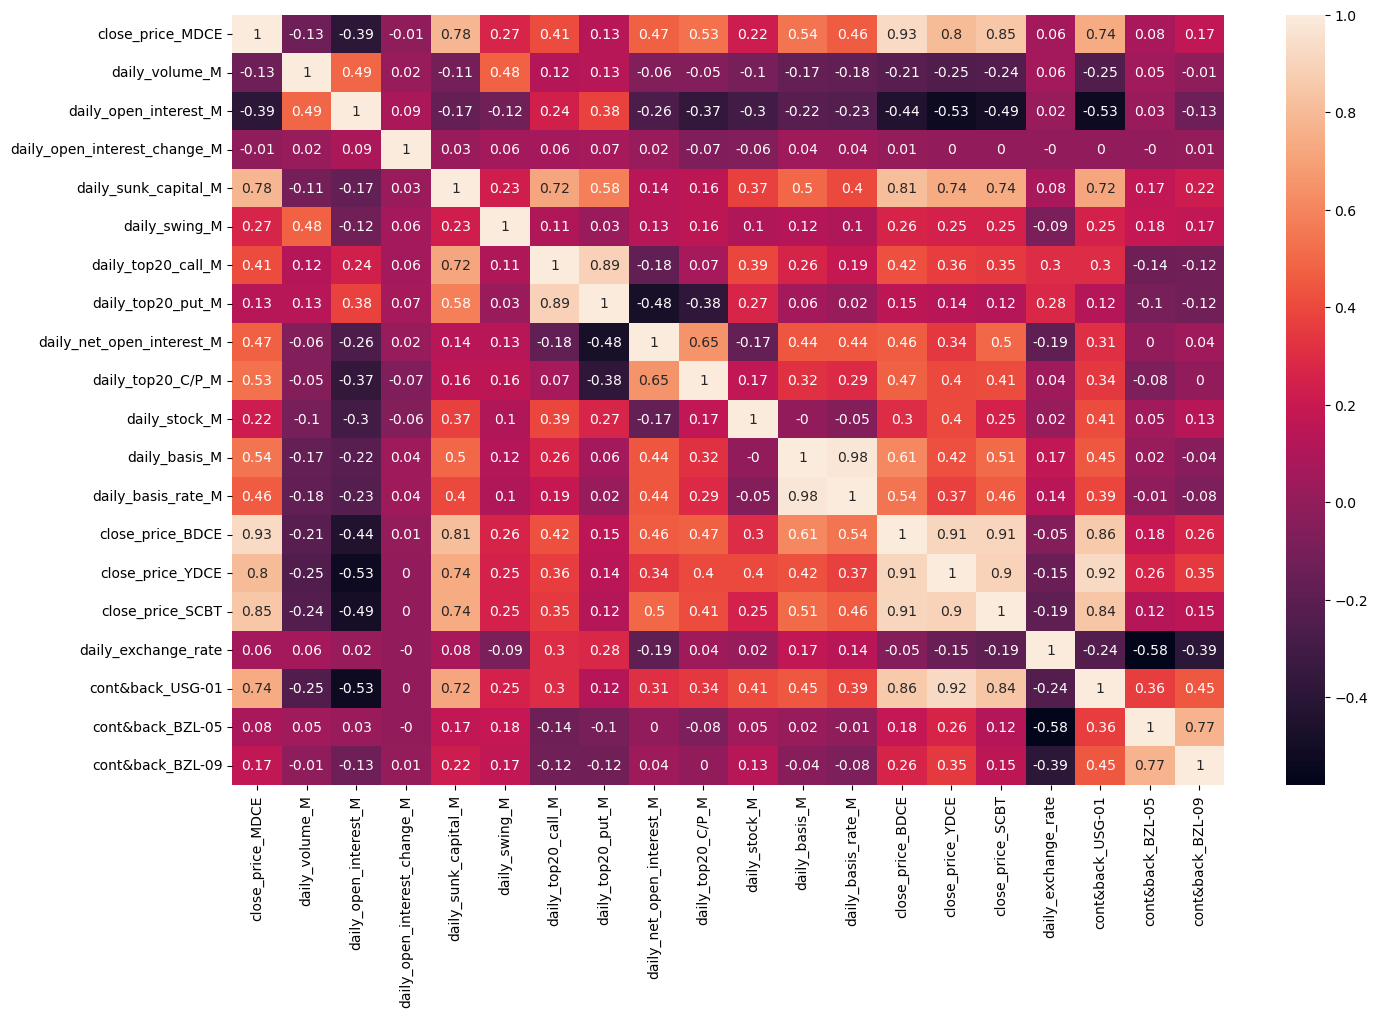

In [8]:
# Create a correlation matrix rounding to one decimal point
correlation_matrix = data_df.corr().round(2)
# Print a correlation heat map
plt.figure(figsize=(16,10))
sns.heatmap(data=correlation_matrix,annot=True)

# Separate the target (Y) from the features (Xs)

In [9]:
# Create a target variable
data_target = data_df.close_price_MDCE
data_target

date
18/9/2017     2738
19/9/2017     2741
20/9/2017     2730
21/9/2017     2730
22/9/2017     2741
              ... 
25/10/2024    2984
28/10/2024    2948
29/10/2024    2985
30/10/2024    3012
31/10/2024    3015
Name: close_price_MDCE, Length: 1726, dtype: int64

In [10]:
# Use the Kolmogorov-Smirnov test
from scipy.stats import kstest

for col in data_df.columns: # iteratre over each column
     # compare the column distribution to a normal distribution
    statistic, pval = kstest(data_df[col], "norm")
    print(f"column = {col}") 
    print(f"p value = {pval}")
    if pval < 0.05:
        print("Probably not normal")
    else:
        print("Probaly normal")
    print("\n")

column = close_price_MDCE
p value = 0.0
Probably not normal


column = daily_volume_M
p value = 0.0
Probably not normal


column = daily_open_interest_M
p value = 0.0
Probably not normal


column = daily_open_interest_change_M
p value = 0.0
Probably not normal


column = daily_sunk_capital_M
p value = 0.0
Probably not normal


column = daily_swing_M
p value = 0.0
Probably not normal


column = daily_top20_call_M
p value = 0.0
Probably not normal


column = daily_top20_put_M
p value = 0.0
Probably not normal


column = daily_net_open_interest_M
p value = 0.0
Probably not normal


column = daily_top20_C/P_M
p value = 0.0
Probably not normal


column = daily_stock_M
p value = 0.0
Probably not normal


column = daily_basis_M
p value = 0.0
Probably not normal


column = daily_basis_rate_M
p value = 0.0
Probably not normal


column = close_price_BDCE
p value = 0.0
Probably not normal


column = close_price_YDCE
p value = 0.0
Probably not normal


column = close_price_SCBT
p value = 0.0
Proba

In [11]:
# separate the target (y) from the features (x)
y = data_df.close_price_MDCE
x = data_df.drop('close_price_MDCE', axis=1)

In [12]:
y.head()

date
18/9/2017    2738
19/9/2017    2741
20/9/2017    2730
21/9/2017    2730
22/9/2017    2741
Name: close_price_MDCE, dtype: int64

In [13]:
x.head()

,daily_volume_M,daily_open_interest_M,daily_open_interest_change_M,daily_sunk_capital_M,daily_swing_M,daily_top20_call_M,daily_top20_put_M,daily_net_open_interest_M,daily_top20_C/P_M,daily_stock_M,daily_basis_M,daily_basis_rate_M,close_price_BDCE,close_price_YDCE,close_price_SCBT,daily_exchange_rate,cont&back_USG-01,cont&back_BZL-05,cont&back_BZL-09
date,,,,,,,,,,,,,,,,,,,
18/9/2017,1158322,1792144,-30756,34.247872,0.012418,548335,741344,-310374,0.739650,15946,59,0.021071,3280,6354,968.00,6.5618,174.306554,147.925954,150.647538
19/9/2017,1284218,1877552,85408,36.024590,0.010580,571593,782185,-326110,0.730764,15731,70,0.025000,3275,6332,965.00,6.5859,177.306554,148.925954,151.647538
20/9/2017,721788,1834210,-43342,35.000395,0.007326,556127,773549,-338083,0.718929,15731,70,0.025000,3274,6324,969.25,6.5742,174.945762,146.925954,151.647538
21/9/2017,915492,1883094,48884,36.104561,0.006593,591173,788712,-328125,0.749542,15731,59,0.021071,3263,6276,969.25,6.5934,171.945762,146.245558,150.967142
22/9/2017,1811852,2129772,246678,41.296279,0.024808,659196,881069,-360766,0.748177,15681,10,0.003571,3278,6232,984.25,6.5922,171.945762,145.565161,150.286746


# Split the data into training and test

In [14]:
# 手动切片划分
x_train = x.iloc[:1529]   # 前1529行作为训练集
y_train = y.iloc[:1529]
x_test = x.iloc[1529:]    # 后198行作为检测集
y_test = y.iloc[1529:]


# Run the model on the training data and check the performance metrics / score

In [15]:
# 导入OLS线性回归模型
from sklearn.linear_model import LinearRegression

regressor = LinearRegression().fit(x_train, y_train)

In [16]:
# evaluate the model’s performance on the test set using the mean squared error and the coefficient of determination
from sklearn.metrics import mean_squared_error, r2_score

y_pred = regressor.predict(x_test)

print(f"Mean squared error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred):.2f}")

Mean squared error: 9076.20
Coefficient of determination: 0.76


# Plotting the results

In [17]:
print("训练集维度:", x_train.shape, y_train.shape)
print("测试集维度:", x_test.shape, y_test.shape)

训练集维度: (1529, 19) (1529,)
测试集维度: (197, 19) (197,)


In [18]:
# 提取截距和系数
intercept = regressor.intercept_           # 截距项（标量）
coefficients = regressor.coef_             # 回归系数（数组，每个特征对应一个系数）


In [19]:
# 打印结果
print(f"截距 (intercept): {intercept:.8f}")
print("回归系数 (coefficients):")
for i, coef in enumerate(coefficients):
    print(f"  特征 {i+1}: {coef:.8f}")

截距 (intercept): -1521.68471641
回归系数 (coefficients):
  特征 1: 0.00004597
  特征 2: 0.00001009
  特征 3: -0.00004045
  特征 4: 4.67207896
  特征 5: -391.19380092
  特征 6: -0.00056451
  特征 7: 0.00012498
  特征 8: -0.00024730
  特征 9: 1203.53352920
  特征 10: -0.00303738
  特征 11: -0.33164404
  特征 12: 390.38361965
  特征 13: 0.64915149
  特征 14: -0.13463598
  特征 15: 0.57762428
  特征 16: 233.04327338
  特征 17: -0.06630111
  特征 18: 0.18159521
  特征 19: -0.02749072


In [20]:
import statsmodels.api as sm

# 添加截距项
X = sm.add_constant(x_train)  # X为特征矩阵（需为DataFrame或二维数组）

# 拟合模型
model = sm.OLS(y_train, X).fit()

# 输出完整统计结果（含标准误、t值、p值、置信区间）[5,8](@ref)
print(model.summary())

# 单独提取误差分析参数
print("\n系数标准误:", model.bse)      # 各系数的标准误差
print("t统计量:", model.tvalues)      # 各系数的t值
print("p值:", model.pvalues)          # 各系数的显著性水平
print("95%置信区间:\n", model.conf_int(alpha=0.05))  # 默认95%置信水平

                            OLS Regression Results                            
Dep. Variable:       close_price_MDCE   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     1463.
Date:                Tue, 27 May 2025   Prob (F-statistic):               0.00
Time:                        15:15:28   Log-Likelihood:                -9397.1
No. Observations:                1529   AIC:                         1.883e+04
Df Residuals:                    1509   BIC:                         1.894e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 计算方差膨胀因子（VIF>10表示严重共线性）
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\n方差膨胀因子(VIF):", vif)


方差膨胀因子(VIF): [3253.0289542919704, 2.5187923718700524, 4.6687007312304205, 1.0475721446553365, 10.908332062340765, 1.9850006034484722, 68.12662811810145, 74.34104102550063, 4.539993452838993, 15.78227372075452, 2.2377029911392063, 41.99296022331323, 33.04037238812149, 19.61971536394233, 20.687798152740246, 17.923022249117288, 3.5072285062412782, 12.011715972050773, 4.445897725913668, 3.7641163327760445]
